In [1]:
pip install dask[complete] pandas matplotlib


In [2]:
import dask.dataframe as dd

file_path = r"D:\.pyy\CT TECH\Reviews.csv"

df = dd.read_csv(file_path)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
print("Total Rows:", df.shape[0].compute())
print("Partitions:", df.npartitions)
df.dtypes


Total Rows: 568454
Partitions: 4


Id                                  int64
ProductId                 string[pyarrow]
UserId                    string[pyarrow]
ProfileName               string[pyarrow]
HelpfulnessNumerator                int64
HelpfulnessDenominator              int64
Score                               int64
Time                                int64
Summary                   string[pyarrow]
Text                      string[pyarrow]
dtype: object

In [4]:
df_clean = df.dropna(subset=["Score", "Text", "UserId", "ProductId"])
df_clean = df_clean.drop_duplicates()

print("Cleaned Rows:", df_clean.shape[0].compute())


Cleaned Rows: 568454


In [5]:
rating_dist = df_clean.groupby("Score").size().compute()
rating_dist


Score
1     52268
2     29769
3     42640
4     80655
5    363122
dtype: int64

In [6]:
top_products = df_clean.groupby("ProductId").size().nlargest(10).compute()
top_products


ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0013NUGDE    564
B001RVFEP2    564
dtype: int64

In [7]:
top_users = df_clean.groupby("UserId").size().nlargest(10).compute()
top_users


UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
dtype: int64

In [8]:
df_clean.npartitions


4

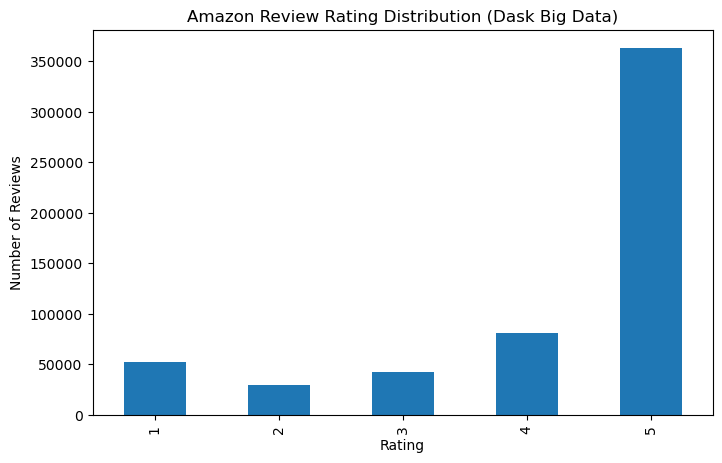

In [9]:
import matplotlib.pyplot as plt

rating_dist.plot(kind='bar', figsize=(8,5))
plt.title("Amazon Review Rating Distribution (Dask Big Data)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()
